# Analisis Exploratorio

In [228]:
# Importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.ticker import PercentFormatter
from matplotlib import rc
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [229]:
df_train_labels = pd.read_csv('train_labels.csv', low_memory=False)
df_train_values = pd.read_csv('train_values.csv', low_memory=False)

In [230]:
df_train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [231]:
df_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


## Preprocesamiento y limpieza de datos

In [232]:
df_buildings = pd.merge(df_train_labels, df_train_values, how='inner', on='building_id')
df_buildings.set_index('building_id', inplace=True)
df_buildings.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
28830,2,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
94947,3,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
590882,2,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
201944,3,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [233]:
df_buildings.isnull().sum()

damage_grade                              0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

Vemos que no tenemos ningún tipo de nulos en ninguna de los features. Además, podemos optimizar el uso de memoria en todos los features teniendo en cuenta su valor máximo y mínimo, o si son categóricos o no.

In [234]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   damage_grade                            260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-

### Conversion de tipos de datos

In [235]:
# Conversion de tipos de datos
to_categorical = set(df_buildings.select_dtypes(include='object').columns.tolist())
to_bool = set([col for col in df_buildings.columns if 'has' in col])
to_numeric = set(df_buildings.select_dtypes(include='int64').columns.tolist()) - to_bool

for col in to_categorical:
    df_buildings[col] = df_buildings[col].astype('category')

for col in to_bool:
    df_buildings[col] = df_buildings[col].astype('bool')

for col in to_numeric:
    df_buildings[col] = pd.to_numeric(df_buildings[col], downcast='unsigned')


In [236]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   damage_grade                            260601 non-null  uint8   
 1   geo_level_1_id                          260601 non-null  uint8   
 2   geo_level_2_id                          260601 non-null  uint16  
 3   geo_level_3_id                          260601 non-null  uint16  
 4   count_floors_pre_eq                     260601 non-null  uint8   
 5   age                                     260601 non-null  uint16  
 6   area_percentage                         260601 non-null  uint8   
 7   height_percentage                       260601 non-null  uint8   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                  

### Analisis de columna has_secondary_use

Algo que llama la atención es la columna *has_secondary_use*, que puede ser redundante teniendo en cuenta que además existen columnas de tipo especifico de
secondary use.

In [237]:
secondary_use = set([col for col in df_buildings.columns if 'has_secondary' in col])
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].shape[0]

231445

In [238]:
df_buildings.loc[df_buildings['has_secondary_use'] == 0, df_buildings.columns.isin(secondary_use)].sum()

has_secondary_use                0
has_secondary_use_agriculture    0
has_secondary_use_hotel          0
has_secondary_use_rental         0
has_secondary_use_institution    0
has_secondary_use_school         0
has_secondary_use_industry       0
has_secondary_use_health_post    0
has_secondary_use_gov_office     0
has_secondary_use_use_police     0
has_secondary_use_other          0
dtype: int64

Vemos que de los 231.445 edificios que no tienen un uso secundario, tampoco tiene un uso secundario especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* resulta redundante.

Ahora, vamos a analizar para los casos que SI tienen un uso secundario.

In [239]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].shape[0]

29156

In [240]:
df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use)].drop(columns='has_secondary_use').sum().sum()

29713

Podemos apreciar que de los 29.156 edificios que tienen un uso secundario, tenemos 29.713 usos secundarios en total. Esta diferencia de 557 puede venir de que algunos edificios tengan más de un uso secundario especifico.

In [241]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]

In [242]:
aux = df_buildings.loc[df_buildings['has_secondary_use'] == 1, df_buildings.columns.isin(secondary_use - set(['has_secondary_use']))]
aux['sum_has_secondary_use'] = aux.sum(axis=1)
aux.head()

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,sum_has_secondary_use
building_id,,,,,,,,,,,
333020,True,False,False,False,False,False,False,False,False,False,1
793397,True,False,False,False,False,False,False,False,False,False,1
973909,True,False,False,False,False,False,False,False,False,False,1
440102,False,False,True,False,False,False,False,False,False,False,1
552720,True,False,False,False,False,False,False,False,False,False,1


In [243]:
aux.loc[aux['sum_has_secondary_use'] > 1, :].shape[0]

557

Finalmente, vemos que efectivamente, la diferencia hallada provenia de aquellos edificios que tienen mas de un uso especifico. Por lo tanto, para estos edificios la feature *has_secondary_use* tambien resulta redundante.

Podemos eliminar dicha feature ya que no nos aporta nada.

In [244]:
df_buildings.drop('has_secondary_use', axis=1, inplace=True)

In [245]:
df_buildings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   damage_grade                            260601 non-null  uint8   
 1   geo_level_1_id                          260601 non-null  uint8   
 2   geo_level_2_id                          260601 non-null  uint16  
 3   geo_level_3_id                          260601 non-null  uint16  
 4   count_floors_pre_eq                     260601 non-null  uint8   
 5   age                                     260601 non-null  uint16  
 6   area_percentage                         260601 non-null  uint8   
 7   height_percentage                       260601 non-null  uint8   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                  

## Analisis por estructura de edificios

Comenzamos por un analisis cuantitativo, queremos ver que con qué material fueron construidos los edificios. Buscaremos analizar si dichos materiales tuvieron o no incidencia en el nivel de daño recibido.

In [246]:
has_superstructure = set([col for col in df_buildings.columns if 'has_superstructure' in col])
only_superstructure = df_buildings.loc[:, has_superstructure]
only_superstructure.head()

,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_stone_flag,has_superstructure_rc_engineered,has_superstructure_cement_mortar_stone,has_superstructure_adobe_mud,has_superstructure_other,has_superstructure_rc_non_engineered,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone
building_id,,,,,,,,,,,
802906,False,False,False,False,False,True,False,False,False,False,True
28830,False,False,False,False,False,False,False,False,False,False,True
94947,False,False,False,False,False,False,False,False,False,False,True
590882,True,True,False,False,False,False,False,False,False,False,True
201944,False,False,False,False,False,True,False,False,False,False,False


In [247]:
only_superstructure['cant_materiales'] = only_superstructure.sum(axis=1, numeric_only=True)

In [248]:
only_superstructure.head()

,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_stone_flag,has_superstructure_rc_engineered,has_superstructure_cement_mortar_stone,has_superstructure_adobe_mud,has_superstructure_other,has_superstructure_rc_non_engineered,has_superstructure_cement_mortar_brick,has_superstructure_mud_mortar_brick,has_superstructure_mud_mortar_stone,cant_materiales
building_id,,,,,,,,,,,,
802906,False,False,False,False,False,True,False,False,False,False,True,2
28830,False,False,False,False,False,False,False,False,False,False,True,1
94947,False,False,False,False,False,False,False,False,False,False,True,1
590882,True,True,False,False,False,False,False,False,False,False,True,3
201944,False,False,False,False,False,True,False,False,False,False,False,1


In [249]:
cantidad_por_estructura = only_superstructure[has_superstructure].sum().sort_values(ascending=False)
cantidad_por_estructura = cantidad_por_estructura.rename(lambda x: x.replace('has_superstructure_', ''))
cantidad_por_estructura

mud_mortar_stone       198561
timber                  66450
adobe_mud               23101
bamboo                  22154
cement_mortar_brick     19615
mud_mortar_brick        17761
rc_non_engineered       11099
stone_flag               8947
cement_mortar_stone      4752
rc_engineered            4133
other                    3905
dtype: int64

In [250]:
cantidad_por_estructura.sum()

380478

In [251]:
# Ojo aca!, divido por la cantidad total de viviendas para saber el % sobre ese espacio.
# Es decir, 76% es sobre el total de viviendas, 25% es sobre el total de viviendas... y la suma de todos los porcentajes es mayor al 100%
# debido a que estas estructuras NO son excluyentes --> una vivienda puede tener mas de una estructura
cantidad_por_estructura / df_buildings.shape[0]

mud_mortar_stone                      0.76
timber                                0.25
adobe_mud                             0.09
bamboo                                0.09
cement_mortar_brick                   0.08
mud_mortar_brick                      0.07
rc_non_engineered                     0.04
stone_flag                            0.03
cement_mortar_stone                   0.02
rc_engineered                         0.02
other                                 0.01
dtype: float64

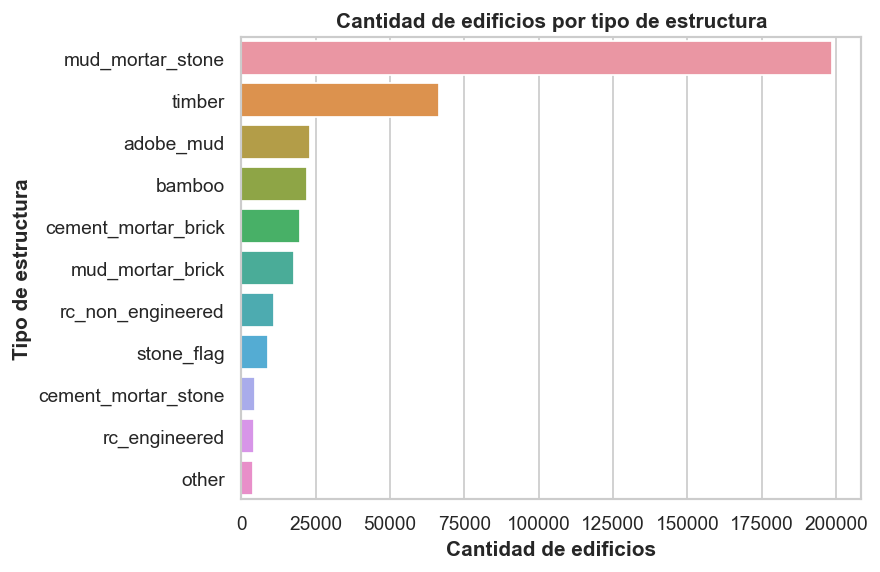

In [252]:
plt.figure(dpi=125)
sns.barplot(y=cantidad_por_estructura.index, x=cantidad_por_estructura.values, orient='h')
plt.ylabel("Tipo de estructura", weight='bold')
plt.xlabel("Cantidad de edificios", weight='bold')
plt.title("Cantidad de edificios por tipo de estructura", weight='bold')
plt.show()

Podemos ver que la gran mayoria (76%) de las edificaciones totales utilizaron barro-piedra para su construccion, 25% fueron construidas con Timber (madera especifica para construccion) seguido de un 9% con adobe-barro y bamboo y un 8% con cemento-ladrillo. Estas categorias no son excluyentes, es decir, hay viviendas que fueron contruidas con barro-piedra y por ejemplo se utilizó timber para soporte interno. Todos estos datos tienen concordancia con lo que se ve de Nepal a nivel nacional, fuera del contexto del terremoto.

Como observacion, recien al final de la decada de 1970 se empezó a construir viviendas con concreto reforzado, y por eso las pocas que hay construidas son en su mayoría de concreto reforzado no diseñado.

A continuación, veremos si en estos 5 primeros tipos de materiales podemos hallar algún tipo de incidencia respecto del daño recibido, ya que son las edificaciones con mayor cantidad de datos.

In [253]:
only_superstructure['cant_materiales'].value_counts()

1    176016
2     57838
3     20210
4      4925
5      1259
6       314
7        35
8         4
Name: cant_materiales, dtype: int64

In [254]:
cantidad_por_cantidad_de_materiales = only_superstructure['cant_materiales'].value_counts()
cantidad_por_cantidad_de_materiales = 100 * cantidad_por_cantidad_de_materiales / cantidad_por_cantidad_de_materiales.sum()
cantidad_por_cantidad_de_materiales

1                  67.54
2                  22.19
3                   7.76
4                   1.89
5                   0.48
6                   0.12
7                   0.01
8                   0.00
Name: cant_materiales, dtype: float64

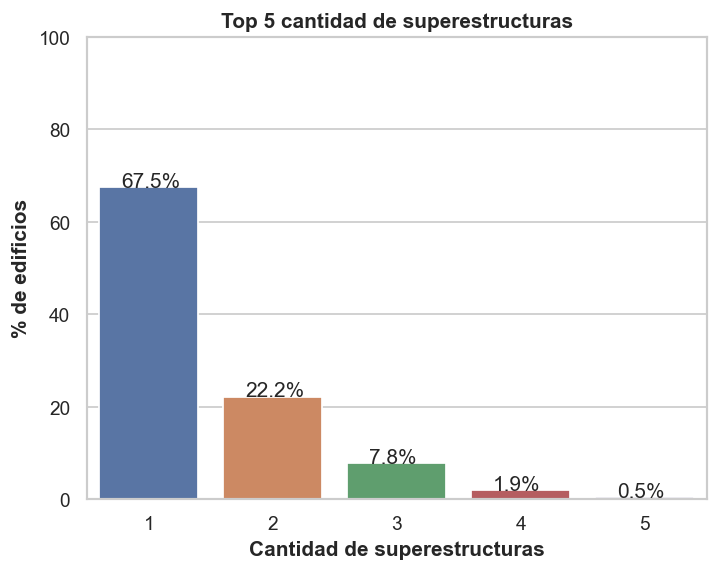

In [255]:
# Graficamos solo el top 5, haciendo el corte en > 1000 casos
plt.figure(dpi=125)
g = sns.barplot(x=cantidad_por_cantidad_de_materiales[:-3].index, y=cantidad_por_cantidad_de_materiales[:-3].values, orient='v')
g.set_ylim(0, 100)
for p in g.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.175
    pos_y = p.get_height()
    g.text(pos_x, pos_y, texto)
plt.ylabel("% de edificios", weight='bold')
plt.xlabel("Cantidad de superestructuras", weight='bold')
plt.title("Top 5 cantidad de superestructuras", weight='bold')
plt.show(g)

### ¿A mayor cantidad de superestructuras utilizadas, menor es el daño recibido?

In [256]:
cant_materiales_y_danio = only_superstructure.merge(df_buildings, how='inner', on='building_id').loc[:, ['cant_materiales', 'damage_grade']]

# Me quedo solo con aquellos casos de cant_materiales < 5 para graficar
top_5_por_cant_materiales_y_danio = cant_materiales_y_danio.loc[cant_materiales_y_danio['cant_materiales'] <= 5, :]
top_5_por_cant_materiales_y_danio

,cant_materiales,damage_grade
building_id,,
802906,2,3
28830,1,2
94947,1,3
590882,3,2
201944,1,3
...,...,...
688636,1,2
669485,1,3
602512,1,3


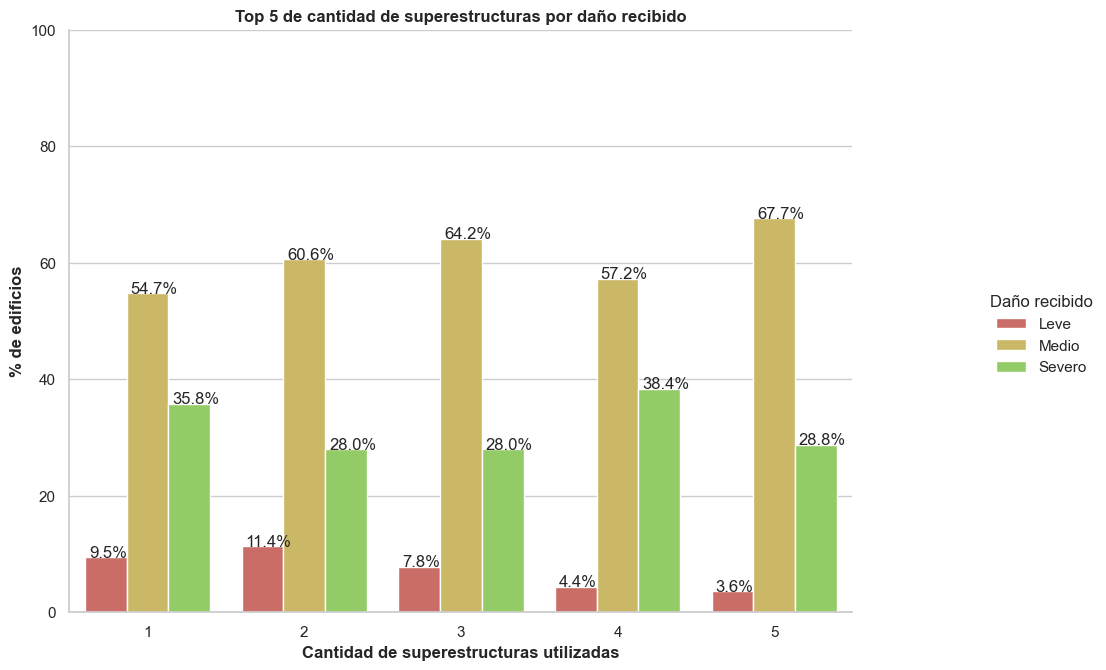

In [257]:
top_5_por_cant_materiales_y_danio_pct = top_5_por_cant_materiales_y_danio.groupby('cant_materiales')['damage_grade'].value_counts(normalize=True)
top_5_por_cant_materiales_y_danio_pct = top_5_por_cant_materiales_y_danio_pct.mul(100)
top_5_por_cant_materiales_y_danio_pct = top_5_por_cant_materiales_y_danio_pct.rename('porcentaje').reset_index()

g = sns.catplot(palette = sns.color_palette("hls", 8), x='cant_materiales', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_por_cant_materiales_y_danio_pct)
g.ax.set_ylim(0,100)
g.fig.set_size_inches(12, 7)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel('Cantidad de superestructuras utilizadas', weight='bold')
plt.title('Top 5 de cantidad de superestructuras por daño recibido', weight='bold')
plt.show(g)

Podemos apreciar que a medida que aumentan la cantidad de superestructuras utilizadas, aumenta parcialmente el porcentaje de edificios que sufrieron un daño medio. Esto se encuentra principalmente afectado por la cantidad de viviendas que sufrieron un grado de daño de nivel 2, que representan la mayoria del dataset.
Si nos centramos unicamente en los niveles 1-leve y 3-severo, tampoco podemos sacar mucha información ya que en algunos casos éstos aumentan o disminuyen para aumentar el porcentaje de viviendas que recibieron un daño medio.

En general, no podemos afirmar que a mayor cantidad de superestructuras utilizadas, menor es el daño recibido. Por lo tanto, vamos a realizar un analisis un poco mas profundo centrandonos en los tipos de superestructuras utilizados en las viviendas.

#### ¿Cual fue el tipo de edificacion que se vio más afectada? ¿Cual fue la que menos fue afectada?

In [258]:
top_5_construcciones_utilizadas = cantidad_por_estructura[:5].index.tolist()
top_5_construcciones_utilizadas

['mud_mortar_stone', 'timber', 'adobe_mud', 'bamboo', 'cement_mortar_brick']

In [259]:
cols_necesarias = {'has_superstructure_mud_mortar_stone', 'has_superstructure_timber', 'has_superstructure_adobe_mud', 'has_superstructure_bamboo',\
                  'has_superstructure_cement_mortar_brick'}
top_estructuras = df_buildings.loc[(df_buildings['has_superstructure_mud_mortar_stone'] == 1 )| (df_buildings['has_superstructure_timber'] == 1 )|\
                 (df_buildings['has_superstructure_adobe_mud'] == 1) | (df_buildings['has_superstructure_bamboo'] == 1) |\
                (df_buildings['has_superstructure_cement_mortar_brick']) == 1, cols_necesarias]
top_estructuras.columns = top_estructuras.columns.map(lambda x: x.replace('has_superstructure_', ''))
top_estructuras.head()

,timber,bamboo,adobe_mud,cement_mortar_brick,mud_mortar_stone
building_id,,,,,
802906,False,False,True,False,True
28830,False,False,False,False,True
94947,False,False,False,False,True
590882,True,True,False,False,True
201944,False,False,True,False,False


In [260]:
# Esto funciona pero tarda un poquito
top_estructuras['superestructura'] = top_estructuras.apply(lambda x: '_and_'.join(x.index[x == 1]), axis=1)

In [261]:
top_estructuras['superestructura'].value_counts()

mud_mortar_stone                                                                143142
timber_and_mud_mortar_stone                                                      32517
cement_mortar_brick                                                              15031
timber_and_bamboo_and_mud_mortar_stone                                           12686
adobe_mud                                                                        11458
timber                                                                            7803
adobe_mud_and_mud_mortar_stone                                                    4653
timber_and_bamboo                                                                 4357
timber_and_cement_mortar_brick                                                    2121
timber_and_adobe_mud_and_mud_mortar_stone                                         2016
timber_and_adobe_mud                                                              1854
bamboo_and_mud_mortar_stone                

In [262]:
top_estructuras['superestructura'].value_counts(normalize=True)

mud_mortar_stone                                                                               0.59
timber_and_mud_mortar_stone                                                                    0.13
cement_mortar_brick                                                                            0.06
timber_and_bamboo_and_mud_mortar_stone                                                         0.05
adobe_mud                                                                                      0.05
timber                                                                                         0.03
adobe_mud_and_mud_mortar_stone                                                                 0.02
timber_and_bamboo                                                                              0.02
timber_and_cement_mortar_brick                                                                 0.01
timber_and_adobe_mud_and_mud_mortar_stone                                                      0.01


In [263]:
# Mergeo para recuperar damage_grade
cols_aux = set(top_estructuras.columns).union(set(['damage_grade']))
top_estructuras = top_estructuras.join(df_buildings, on='building_id', how='inner',).loc[:, cols_aux]

In [264]:
top_estructuras.head()

,superestructura,cement_mortar_brick,adobe_mud,mud_mortar_stone,bamboo,damage_grade,timber
building_id,,,,,,,
802906,adobe_mud_and_mud_mortar_stone,False,True,True,False,3,False
28830,mud_mortar_stone,False,False,True,False,2,False
94947,mud_mortar_stone,False,False,True,False,3,False
590882,timber_and_bamboo_and_mud_mortar_stone,False,False,True,True,2,True
201944,adobe_mud,False,True,False,False,3,False


In [265]:
# Selecciono solo los casos en donde tenga mud_mortar_stone
cantidad_por_tipo_y_danio_mud_stone = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 1, :]\
                            .groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
cantidad_por_tipo_y_danio_mud_stone['porcentaje'] = (cantidad_por_tipo_y_danio_mud_stone / (cantidad_por_tipo_y_danio_mud_stone.groupby(level=0).transform("sum"))) * 100
cantidad_por_tipo_y_danio_mud_stone.reset_index(inplace=True)
cantidad_por_tipo_y_danio_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud_and_cement_mortar_brick_and_mud_mort...,1,2,2.38
1,adobe_mud_and_cement_mortar_brick_and_mud_mort...,2,74,88.10
2,adobe_mud_and_cement_mortar_brick_and_mud_mort...,3,8,9.52
3,adobe_mud_and_mud_mortar_stone,1,115,2.47
4,adobe_mud_and_mud_mortar_stone,2,2896,62.24


In [266]:
aux = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 1, :]['superestructura'].value_counts()
aux

mud_mortar_stone                                                                143142
timber_and_mud_mortar_stone                                                      32517
timber_and_bamboo_and_mud_mortar_stone                                           12686
adobe_mud_and_mud_mortar_stone                                                    4653
timber_and_adobe_mud_and_mud_mortar_stone                                         2016
bamboo_and_mud_mortar_stone                                                       1266
timber_and_bamboo_and_adobe_mud_and_mud_mortar_stone                              1076
cement_mortar_brick_and_mud_mortar_stone                                           669
timber_and_cement_mortar_brick_and_mud_mortar_stone                                262
adobe_mud_and_cement_mortar_brick_and_mud_mortar_stone                              84
timber_and_bamboo_and_cement_mortar_brick_and_mud_mortar_stone                      83
bamboo_and_adobe_mud_and_mud_mortar_stone  

In [267]:
top_5_de_mud_stone = aux[:5].index.tolist()
top_5_estructuras_y_daño_mud_stone = cantidad_por_tipo_y_danio_mud_stone.loc[cantidad_por_tipo_y_danio_mud_stone['superestructura'].isin(top_5_de_mud_stone), :]
top_5_estructuras_y_daño_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
3,adobe_mud_and_mud_mortar_stone,1,115,2.47
4,adobe_mud_and_mud_mortar_stone,2,2896,62.24
5,adobe_mud_and_mud_mortar_stone,3,1642,35.29
17,mud_mortar_stone,1,5349,3.74
18,mud_mortar_stone,2,79385,55.46


In [268]:
top_5_estructuras_y_daño_mud_stone['superestructura'].unique()

array(['adobe_mud_and_mud_mortar_stone', 'mud_mortar_stone',
       'timber_and_adobe_mud_and_mud_mortar_stone',
       'timber_and_bamboo_and_mud_mortar_stone',
       'timber_and_mud_mortar_stone'], dtype=object)

In [269]:
# Cambio los nombres para poder plottear bien y que los nombres no se superpongan
top_5_estructuras_y_daño_mud_stone['superestructura'].replace({'mud_mortar_stone': 'solo_barro_piedra', 'mud_mortar_stone_and_adobe_mud': 'con_adobe',\
                                                              'mud_mortar_stone_and_adobe_mud_and_timber': 'con_adobe_y_timber',\
                                                               'mud_mortar_stone_and_timber_and_adobe_mud': 'con_adobe_y_timber',\
                                                              'mud_mortar_stone_and_timber': 'con_timber',\
                                                              'mud_mortar_stone_and_timber_and_bamboo': 'con_timber_y_bamboo',\
                                                              'bamboo_and_mud_mortar_stone_and_timber': 'con_timber_y_bamboo'}, inplace=True)

In [270]:
top_5_estructuras_y_daño_mud_stone['superestructura'].unique()

array(['adobe_mud_and_mud_mortar_stone', 'solo_barro_piedra',
       'timber_and_adobe_mud_and_mud_mortar_stone',
       'timber_and_bamboo_and_mud_mortar_stone',
       'timber_and_mud_mortar_stone'], dtype=object)

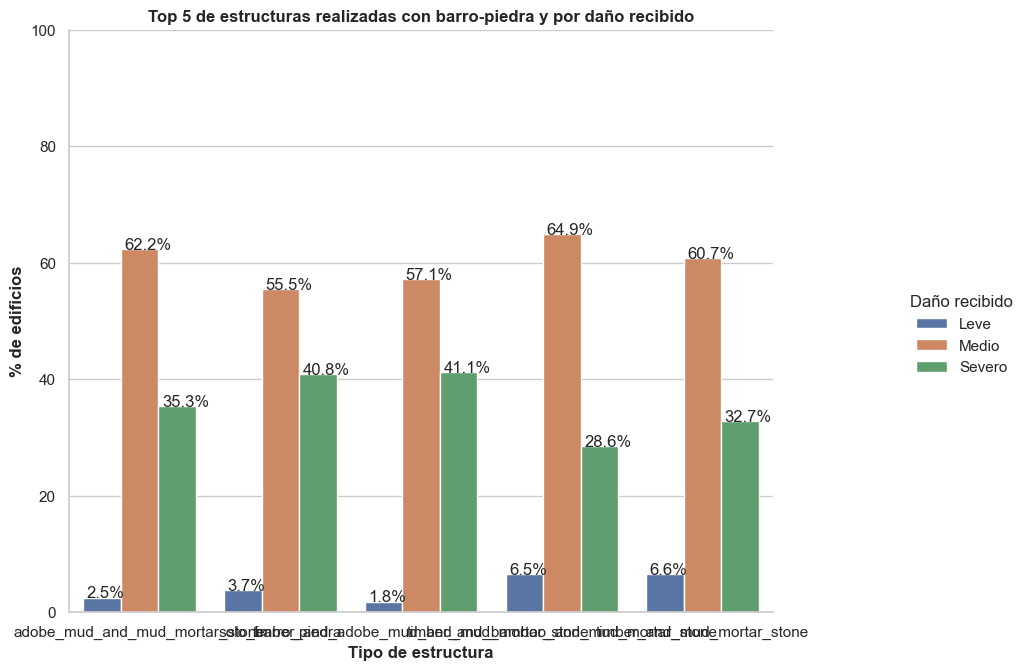

In [271]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_estructuras_y_daño_mud_stone, orient='v')
g.fig.set_size_inches(12, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Top 5 de estructuras realizadas con barro-piedra y por daño recibido", weight='bold')
plt.show(g)

Dentro del grupo de construcciones fabricadas con barro-piedra, podemos ver que aquellas estructuras construidas con solamente barro-piedra y aquellas con barro-piedra-adobe-timber fueron las más afectadas. Por otro lado, las construcciones que fueron fabricadas con timber son las que menos daño severo y mayor daño leve recibieron. Esto tiene sentido ya que el timber es un material que suele ser resistente a daños sismicos. Sin embargo,  el caso de barro-piedra-adobe-timber nos puede indicar que el nivel de intensidad de los terremotos que afectaron a ese tipo de estructuras fueron lo suficientemente fuerte como para dañarlos, pese a tener una mayor cantidad de estructuras diversas.

In [272]:
# Selecciono solo los casos en donde NO tenga mud_mortar_stone
cantidad_por_tipo_y_danio_sin_mud_stone = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 0, :]\
                            .groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
cantidad_por_tipo_y_danio_sin_mud_stone['porcentaje'] = (cantidad_por_tipo_y_danio_sin_mud_stone / (cantidad_por_tipo_y_danio_sin_mud_stone.groupby(level=0).transform("sum"))) * 100
cantidad_por_tipo_y_danio_sin_mud_stone.reset_index(inplace=True)
cantidad_por_tipo_y_danio_sin_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud,1,280,2.44
1,adobe_mud,2,6711,58.57
2,adobe_mud,3,4467,38.99
3,adobe_mud_and_cement_mortar_brick,1,21,4.28
4,adobe_mud_and_cement_mortar_brick,2,387,78.82


In [273]:
aux = top_estructuras.loc[top_estructuras['mud_mortar_stone'] == 0, :]['superestructura'].value_counts()
aux

cement_mortar_brick                                        15031
adobe_mud                                                  11458
timber                                                      7803
timber_and_bamboo                                           4357
timber_and_cement_mortar_brick                              2121
timber_and_adobe_mud                                        1854
bamboo                                                      1116
timber_and_bamboo_and_adobe_mud                              897
adobe_mud_and_cement_mortar_brick                            491
timber_and_bamboo_and_cement_mortar_brick                    353
timber_and_adobe_mud_and_cement_mortar_brick                 313
bamboo_and_adobe_mud                                          99
bamboo_and_cement_mortar_brick                                76
timber_and_bamboo_and_adobe_mud_and_cement_mortar_brick       65
bamboo_and_adobe_mud_and_cement_mortar_brick                   3
Name: superestructura, dt

In [274]:
top_5_sin_mud_stone = aux[:5].index.tolist()
top_5_estructuras_y_daño_sin_mud_stone = cantidad_por_tipo_y_danio_sin_mud_stone.loc[cantidad_por_tipo_y_danio_sin_mud_stone['superestructura'].isin(top_5_sin_mud_stone), :]
top_5_estructuras_y_daño_sin_mud_stone.head()

,superestructura,damage_grade,cantidad,porcentaje
0,adobe_mud,1,280,2.44
1,adobe_mud,2,6711,58.57
2,adobe_mud,3,4467,38.99
17,cement_mortar_brick,1,6152,40.93
18,cement_mortar_brick,2,8237,54.80


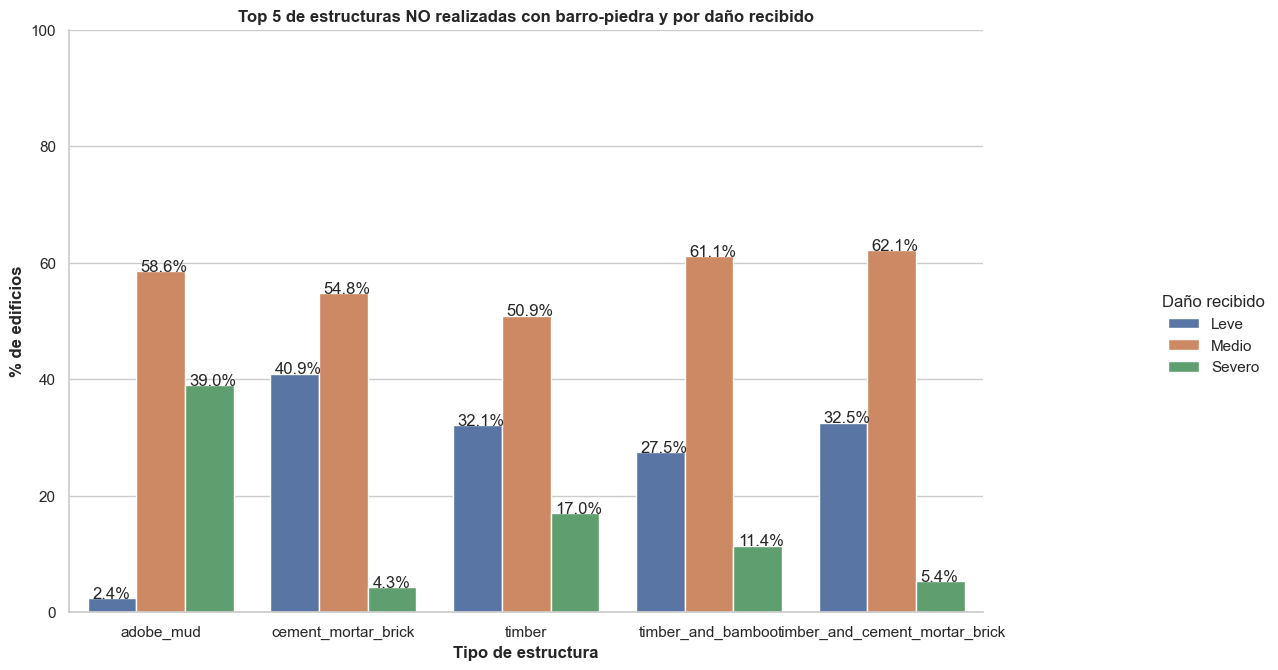

In [275]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=top_5_estructuras_y_daño_sin_mud_stone, orient='v')
g.fig.set_size_inches(14, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Top 5 de estructuras NO realizadas con barro-piedra y por daño recibido", weight='bold')
plt.show(g)

Si dejamos afuera a las viviendas de barro-piedra, vemos una vez mas que el timber es uno de los materiales importantes a la hora de reducir los daños recibidos. Al mismo tiempo, se observa que el cemento-ladrillo es muchisimo mejor que barro-piedra, siendo este ultimo mas propicio a recibir peores daños sismicos. Por otro lado, se ve que adobe-barro tiene un comportamiento similar a barro-piedra en cuanto a los 3 niveles de daños comparados.

Es de suma importancia aclarar que, en funcion a la cantidad de datos registrados, se dejo de lado en esta comparacion a 3 tipos de edificaciones que, a priori, serían las viviendas más y menos resistentes daños sismico. Los 3 tipos mencionados se compararan a continuacion

In [276]:
# Que pasa si comparamos aquellas con concreto reforzado no-diseñado/diseñado y con viviendas construidas con piedras?
for_comparison = ['has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_stone_flag']
edificios_con_stone_y_rc = df_buildings.loc[(df_buildings['has_superstructure_stone_flag'] == 1) |\
                                                   (df_buildings['has_superstructure_rc_engineered'] == 1) |\
                                                   (df_buildings['has_superstructure_rc_non_engineered'] == 1), for_comparison]

In [277]:
edificios_con_stone_y_rc['superestructura'] = edificios_con_stone_y_rc.idxmax(axis=1)
edificios_con_stone_y_rc['superestructura'] = edificios_con_stone_y_rc['superestructura'].map(lambda x: x.replace('has_superstructure_', ''))
edificios_con_stone_y_rc = edificios_con_stone_y_rc.join(df_buildings.loc[:, ['damage_grade']], how='inner', on='building_id')
edificios_con_stone_y_rc.head()

,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_stone_flag,superestructura,damage_grade
building_id,,,,,
605134,False,False,True,stone_flag,3
306024,False,False,True,stone_flag,2
440102,True,False,False,rc_non_engineered,1
877361,False,False,True,stone_flag,2
288541,False,True,False,rc_engineered,1


In [278]:
agrupado_por_daño_y_estructura = edificios_con_stone_y_rc.groupby(['superestructura', 'damage_grade']).agg({'superestructura': 'count'})\
                            .rename(columns={'superestructura': 'cantidad'})
agrupado_por_daño_y_estructura['porcentaje'] = (agrupado_por_daño_y_estructura / (agrupado_por_daño_y_estructura.groupby(level=0).transform("sum"))) * 100
agrupado_por_daño_y_estructura.reset_index(inplace=True)
agrupado_por_daño_y_estructura.head()

,superestructura,damage_grade,cantidad,porcentaje
0,rc_engineered,1,2596,64.29
1,rc_engineered,2,1371,33.95
2,rc_engineered,3,71,1.76
3,rc_non_engineered,1,3857,34.75
4,rc_non_engineered,2,5832,52.55


In [279]:
agrupado_por_daño_y_estructura

,superestructura,damage_grade,cantidad,porcentaje
0,rc_engineered,1,2596,64.29
1,rc_engineered,2,1371,33.95
2,rc_engineered,3,71,1.76
3,rc_non_engineered,1,3857,34.75
4,rc_non_engineered,2,5832,52.55
5,rc_non_engineered,3,1410,12.70
6,stone_flag,1,165,1.95
7,stone_flag,2,4232,49.93
8,stone_flag,3,4079,48.12


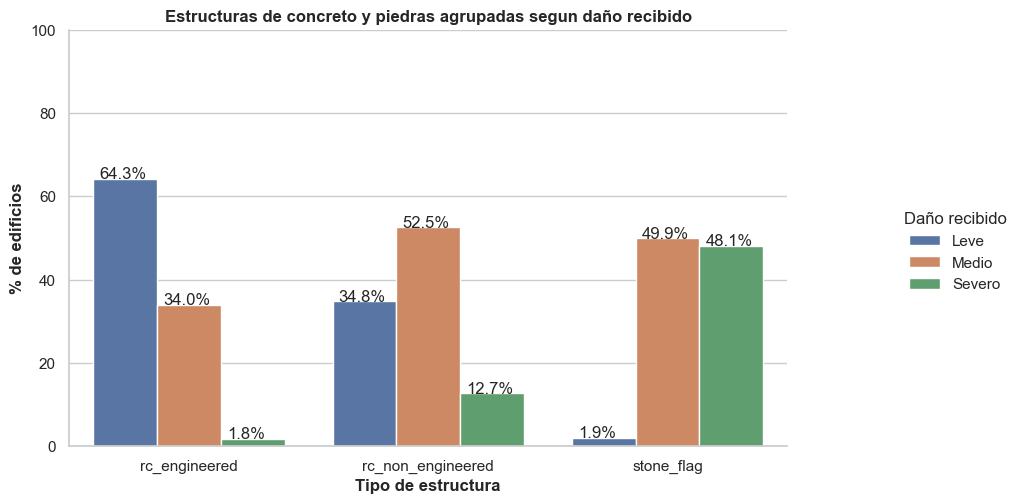

In [280]:
g = sns.catplot(x='superestructura', y='porcentaje', hue='damage_grade', kind='bar', data=agrupado_por_daño_y_estructura, orient='v')
g.fig.set_size_inches(11, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
g.ax.set_ylim(0, 100)
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Tipo de estructura", weight='bold')
plt.title("Estructuras de concreto y piedras agrupadas segun daño recibido", weight='bold')
plt.show(g)

Es evidente que dentro de este pequeño grupo, en concordancia con nuestra hipotesis, aquellas edificaciones con concreto reforzado diseñado son las que menos daños sufrieron mientras que aquellas fabricadas con solamente piedra fueron las que más daño recibieron.

### ¿Los edificios con menor antiguedad sufrieron menos daño?

In [281]:
bins = [0, 50, 100, 150, 300, 500, 600, 700, 800, 900, 950]
age_by_bins = df_buildings['age'].value_counts(bins=bins).to_frame()
age_by_bins = age_by_bins.reset_index().rename(columns={'index': 'rango_antiguedad', 'age':'cantidad'})
age_by_bins = age_by_bins.loc[age_by_bins['cantidad'] > 0]
age_by_bins

,rango_antiguedad,cantidad
0,"(-0.001, 50.0]",242457
1,"(50.0, 100.0]",16020
2,"(100.0, 150.0]",595
3,"(150.0, 300.0]",139


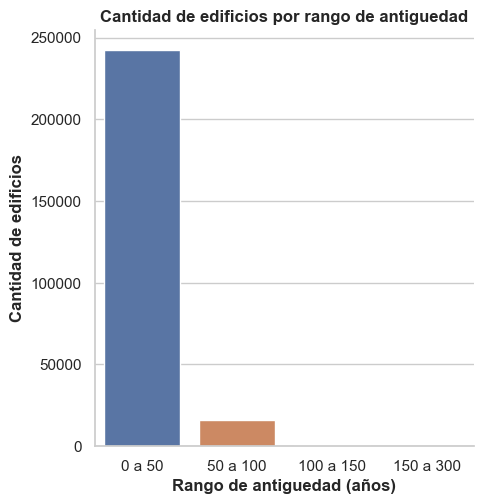

In [282]:
g = sns.catplot(x='rango_antiguedad', y='cantidad', kind='bar', data=age_by_bins, orient='v')
plt.ylabel("Cantidad de edificios", weight='bold')
plt.xlabel('Rango de antiguedad (años)', weight='bold')
plt.title("Cantidad de edificios por rango de antiguedad", weight='bold')
g.set_xticklabels(['0 a 50', '50 a 100', '100 a 150', '150 a 300'])
plt.show(g)

In [283]:
# Nos quedamos con los edificios con una antiguedad menor a 50 años para comparar debido a la poca cantidad de datos para age >= 50.
age_under_50 = df_buildings.loc[df_buildings['age'] <= 50, ['age', 'damage_grade']]
age_under_50 = age_under_50.groupby(['age', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
age_under_50['porcentaje'] = (age_under_50 / (age_under_50.groupby(level=0).transform("sum"))) * 100
age_under_50.reset_index(inplace=True)

In [284]:
age_under_50.head()

,age,damage_grade,cantidad,porcentaje
0,0,1,7213,27.70
1,0,2,12721,48.85
2,0,3,6107,23.45
3,5,1,5590,16.59
4,5,2,19030,56.47


In [285]:
# Nos quedamos con los edificios con antiguedad mayor a 100 para ver que pasa
age_to_select = [100, 120, 150, 200, 995]
age_over_100 = df_buildings.loc[df_buildings['age'].isin(age_to_select), ['age', 'damage_grade']]
age_over_100 = age_over_100.groupby(['age', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
age_over_100['porcentaje'] = (age_over_100 / (age_over_100.groupby(level=0).transform("sum"))) * 100
age_over_100.reset_index(inplace=True)

In [286]:
age_over_100

,age,damage_grade,cantidad,porcentaje
0,100,1,10,0.73
1,100,2,911,66.79
2,100,3,443,32.48
3,120,1,2,1.11
4,120,2,98,54.44
5,120,3,80,44.44
6,150,1,1,0.70
7,150,2,97,68.31
8,150,3,44,30.99
9,200,1,3,2.83


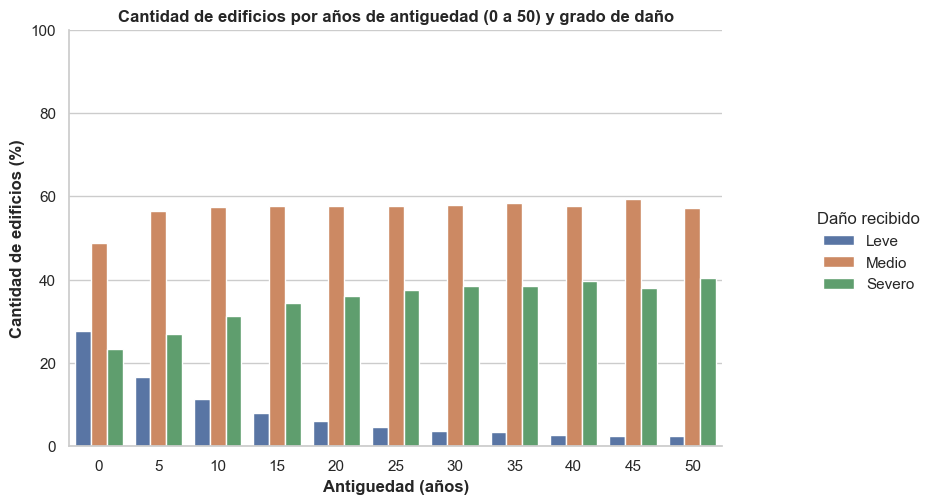

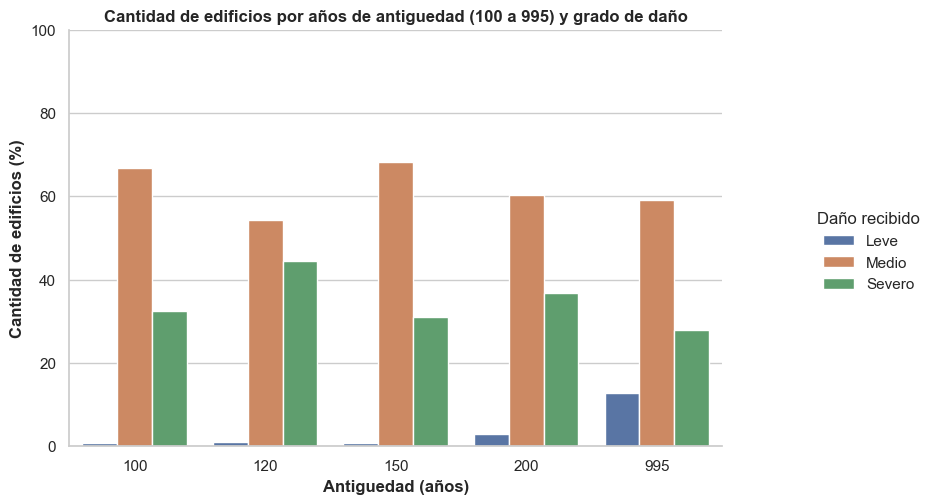

In [287]:
def plot_bar_pct(df, title):
    g = sns.catplot(x='age', y='porcentaje', hue='damage_grade', kind='bar', data=df, orient='v')
    g.fig.set_size_inches(10, 5)
    g._legend.set_title('Daño recibido')
    g.ax.set_ylim(0, 100)
    new_labels = ['Leve', 'Medio', 'Severo']
    for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
    plt.ylabel("Cantidad de edificios (%)", weight='bold')
    plt.xlabel('Antiguedad (años)', weight='bold')
    plt.title(title, weight='bold')
    plt.show(g)

plot_bar_pct(age_under_50, "Cantidad de edificios por años de antiguedad (0 a 50) y grado de daño")
plot_bar_pct(age_over_100, "Cantidad de edificios por años de antiguedad (100 a 995) y grado de daño")

Para el rango de 0-50 años de antiguedad, se puede ver que arriba del 50% de los edificios sufrieron un grado de daño de nivel medio, mientras que un porcentaje mayor al 30% sufrieron daño severo. Es interesante observar como a medida que la antiguedad va aumentando, la cantidad de edificios que sufrieron daños leves va disminuyendo al mismo tiempo que la cantidad de viviendas que sufrieron un daño grave va aumentando. 

Si analizamos para aquellos edificios con una antiguedad mayor a 100, podemos ver que esta tendencia se sigue manteniendo. Sin embargo, aquellos edificios con una antiguedad de 995 años tienen un comportamiento similar a los edificios con antiguedad entre 0 y 10 años. Esto puede atribuirse a que dichos edificios pueden ser historicos con una constante remodelacion y/o reacondicionamiento con el fin de hacerlos mas resistentes a daños sismicos.

En general podemos decir que los edificios con menor antiguedad sufrieron menos daño.

### ¿Los edificios con mayor cantidad de pisos sufrieron un mayor daño?

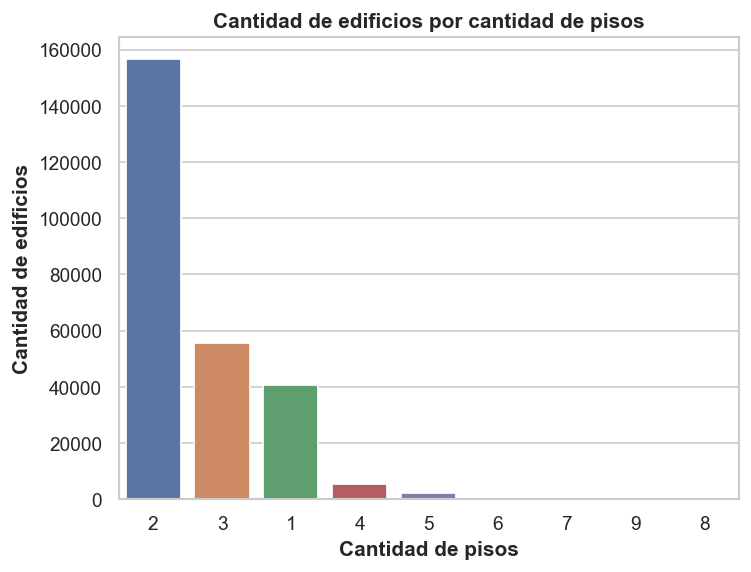

In [288]:
plt.figure(dpi=125)
sns.countplot(x='count_floors_pre_eq', data=df_buildings, order=df_buildings['count_floors_pre_eq'].value_counts()[:].index, orient='v')
plt.ylabel("Cantidad de edificios", weight='bold')
plt.xlabel("Cantidad de pisos", weight='bold')
plt.title("Cantidad de edificios por cantidad de pisos", weight='bold')
plt.show()

In [289]:
cantidad_por_pisos_y_danio = df_buildings.loc[:, ['count_floors_pre_eq', 'damage_grade']]
cantidad_por_pisos_y_danio = cantidad_por_pisos_y_danio.groupby(['count_floors_pre_eq', 'damage_grade']).agg({'damage_grade': 'count'})\
                            .rename(columns={'damage_grade': 'cantidad'})
cantidad_por_pisos_y_danio['porcentaje'] = (cantidad_por_pisos_y_danio / (cantidad_por_pisos_y_danio.groupby(level=0).transform("sum"))) * 100
cantidad_por_pisos_y_danio.reset_index(inplace=True)

In [290]:
cantidad_por_pisos_y_danio.head()

,count_floors_pre_eq,damage_grade,cantidad,porcentaje
0,1,1,8969,22.18
1,1,2,20798,51.43
2,1,3,10674,26.39
3,2,1,12593,8.04
4,2,2,93968,60.00


In [291]:
# Solo analizamos por el top 3 de cantidad de pisos
top_3_cant_pisos = cantidad_por_pisos_y_danio['count_floors_pre_eq'].value_counts(normalize=True)[0:3].index.tolist()
top_3_cant_pisos = cantidad_por_pisos_y_danio.loc[cantidad_por_pisos_y_danio['count_floors_pre_eq'].isin(top_3_cant_pisos), :]
top_3_cant_pisos

,count_floors_pre_eq,damage_grade,cantidad,porcentaje
12,5,1,254,11.31
13,5,2,1481,65.94
14,5,3,511,22.75
15,6,1,53,25.36
16,6,2,133,63.64
17,6,3,23,11.00
18,7,1,10,25.64
19,7,2,25,64.10
20,7,3,4,10.26


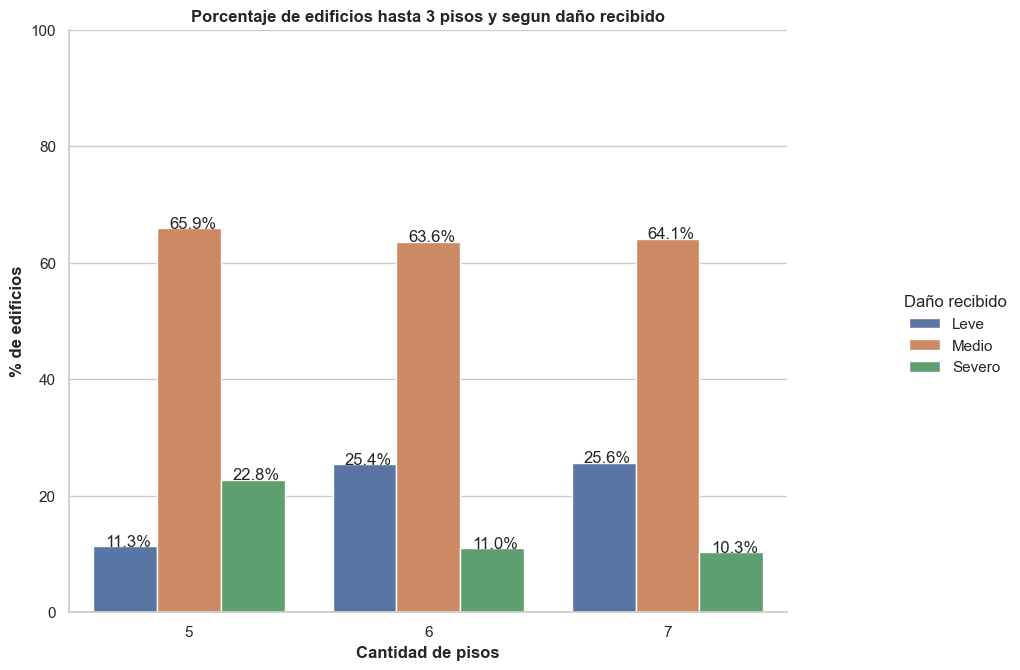

In [292]:
g = sns.catplot(x='count_floors_pre_eq', y='porcentaje', hue='damage_grade', kind='bar', data=top_3_cant_pisos, orient='v')
g.fig.set_size_inches(11, 7)
g._legend.set_title('Daño recibido')
g.ax.set_ylim(0, 100)
new_labels = ['Leve', 'Medio', 'Severo']
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.05
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel("Cantidad de pisos", weight='bold')
plt.title("Porcentaje de edificios hasta 3 pisos y segun daño recibido", weight='bold')
plt.show(g)

Si solo nos quedamos con las viviendas que tienen hasta 3 pisos, se observa claramente que a mayor cantidad de pisos, mayor fue el daño recibido. Es notable ver que la diferencia del 14% entre el porcentaje de edificios de 1 y 2 pisos proviene principalmente en la disminución de viviendas que sufrieron un daño leve, aumentando más la cantidad de edificios que sufrieron un daño medio que los que sufrieron un daño severo. Mientras que en si comparamos las viviendas con 2 y 3 pisos, vemos que se disminuye tanto las viviendas con daño leve y medio para así aumentar en 12% aproximadamente las viviendas con daño severo.
Todo esto puede deberse a que dada las condiciones socioeconomicas de Nepal, y viendo que predominan las viviendas fabricadas, parcial o totalmente, con barro-piedra y fabricadas con timber; sumado a que probablemente no se cumplan las condiciones minimas necesarias para que dichas viviendas sean resistentes a un daño sismico, el aumento de pisos en una vivienda genera condiciones para que dicha vivienda sufra daños mayores.


In [293]:
solo_pisos_1_a_3 = df_buildings.loc[(df_buildings['count_floors_pre_eq'] >= 1) & (df_buildings['count_floors_pre_eq'] <= 3), :]
solo_pisos_1_a_3.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False


In [294]:
cantidad_por_plan_configuracion = solo_pisos_1_a_3['plan_configuration'].value_counts()

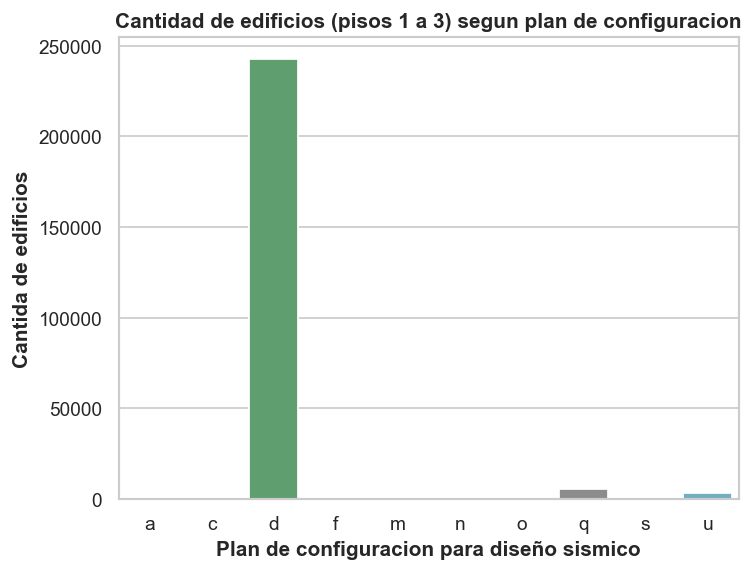

In [295]:
plt.figure(dpi=125)
sns.barplot(x=cantidad_por_plan_configuracion.index, y=cantidad_por_plan_configuracion.values, orient='v')
plt.ylabel('Cantida de edificios', weight='bold')
plt.xlabel('Plan de configuracion para diseño sismico', weight='bold')
plt.title('Cantidad de edificios (pisos 1 a 3) segun plan de configuracion', weight='bold')
plt.show()

Como presuponiamos, para las viviendas con una cantidad de pisos entre 1 y 3, el plan de configuracion para diseño sismico que mas predomina es del tipo 'd'. Si bien este tipo de dato está ofuscado y puede no representar un mismo valor, entendemos que esta categoria es aquella en donde las viviendas tienen nulo o muy poco diseño para resistir daños sismicos. Si nos quedamos con las categorias 'd-q-u' dentro del conjunto de viviendas que tienen entre 1-3 pisos, vemos que

In [296]:
solo_pisos_1_a_3_con_plan_q_u_d = solo_pisos_1_a_3.loc[(solo_pisos_1_a_3['plan_configuration'] == 'q' ) | (solo_pisos_1_a_3['plan_configuration'] == 'u') |\
                                                     (solo_pisos_1_a_3['plan_configuration'] == 'd'),  :]
solo_pisos_1_a_3_con_plan_q_u_d.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False


In [297]:
solo_pisos_1_a_3_con_plan_q_u_d['plan_configuration'] = solo_pisos_1_a_3_con_plan_q_u_d['plan_configuration'].cat.remove_unused_categories()
solo_pisos_1_a_3_con_plan_q_u_d['plan_configuration'].value_counts()

d    242681
q      5517
u      3410
Name: plan_configuration, dtype: int64

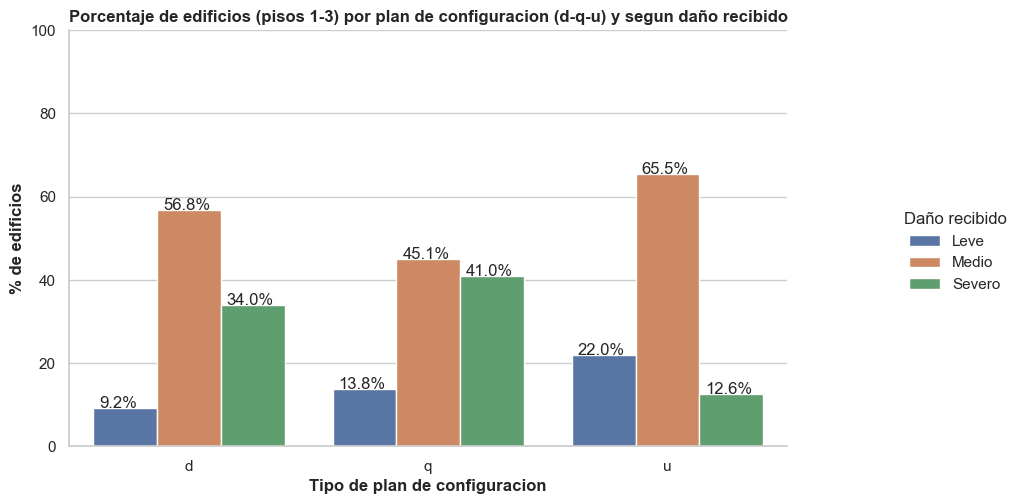

In [298]:
solo_pisos_1_a_3_con_plan_q_u_d_pct = solo_pisos_1_a_3_con_plan_q_u_d.groupby('plan_configuration')['damage_grade'].value_counts(normalize=True)
solo_pisos_1_a_3_con_plan_q_u_d_pct = solo_pisos_1_a_3_con_plan_q_u_d_pct.mul(100)
solo_pisos_1_a_3_con_plan_q_u_d_pct = solo_pisos_1_a_3_con_plan_q_u_d_pct.rename('porcentaje').reset_index()


g = sns.catplot(x="plan_configuration", y='porcentaje', hue='damage_grade', kind='bar', data=solo_pisos_1_a_3_con_plan_q_u_d_pct)
g.fig.set_size_inches(11, 5)
g._legend.set_title('Daño recibido')
new_labels = ['Leve', 'Medio', 'Severo']
g.ax.set_ylim(0, 100)
for x, y in zip(g._legend.texts, new_labels): x.set_text(y)
for p in g.ax.patches:
    texto = str(p.get_height().round(1)) + '%'
    pos_x = p.get_x() + 0.025
    pos_y = p.get_height()
    g.ax.text(pos_x, pos_y, texto)
plt.ylabel('% de edificios', weight='bold')
plt.xlabel('Tipo de plan de configuracion', weight='bold')
plt.title('Porcentaje de edificios (pisos 1-3) por plan de configuracion (d-q-u) y segun daño recibido', weight='bold')
plt.show(g)

Por cuestiones ya mencionadas, predomina el daño medio para estos planes de configuraciones. No obstante, si nos centramos unicamente en los daños leve y severo nos encontramos con la informacion que la categoria 'u' es aquella que tiene el mayor porcentaje de viviendas con daño leve y el menor porcentaje de viviendas con daño severo. Es probable que esta categoria sea aquella que nos indica que las viviendas tienen algun tipo de diseño para daños sismicos (mayor nivel que la categoria 'd')

## Análisis por Región Geográfica

Analizaremos la información que nos brindan las columnas geo_level_1_id, geo_level_2_id, geo_level_3_id intentando buscar si el terremoto afectó más a alguna zona en particular.

In [299]:
df_buildings

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
688636,2,25,1335,1621,1,55,6,3,n,r,...,False,False,False,False,False,False,False,False,False,False
669485,3,17,715,2060,2,0,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
602512,3,17,51,8163,3,55,6,7,t,r,...,False,False,False,False,False,False,False,False,False,False


In [300]:
#veo los id de geo_level_1
geo_level_1 = df_buildings.loc[:, ['geo_level_1_id', 'geo_level_2_id']]\
    .groupby(['geo_level_1_id']).count().reset_index()
geo_level_1.rename(columns = {'geo_level_2_id':'cantidad_viviendas_destruidas'}, inplace = True)
geo_level_1

,geo_level_1_id,cantidad_viviendas_destruidas
0,0,4011
1,1,2701
2,2,931
3,3,7540
4,4,14568
5,5,2690
6,6,24381
7,7,18994
8,8,19080
9,9,3958


In [301]:
geo_level_1['geo_level_1_id'].nunique()

31

Podemos obeservar que hay 31 valores únicos de geo_level_1_id, que se corresponden con los 31 valores posibles del enunciado

In [302]:
geo_level_2 = df_buildings.loc[:, ['geo_level_2_id', 'geo_level_3_id']]\
    .groupby(['geo_level_2_id']).count().reset_index()
geo_level_2.rename(columns = {'geo_level_3_id':'cantidad_viviendas_destruidas'}, inplace = True)
geo_level_2.nlargest(10, 'cantidad_viviendas_destruidas')

,geo_level_2_id,cantidad_viviendas_destruidas
38,39,4038
156,158,2520
179,181,2080
1373,1387,2040
155,157,1897
359,363,1760
458,463,1740
666,673,1704
527,533,1684
874,883,1626


In [303]:
geo_level_2['geo_level_2_id'].nunique()

1414

Hay 1414 valores únicos de geo_level_2_id, sin embargo sabemos que puede tomar 1428 valores posibles. Por lo tanto, hay ciertos id's de esta zona que no se vieron afectados por el terremoto.

In [304]:
geo_level_3 = df_buildings.loc[:, ['geo_level_2_id', 'geo_level_3_id']]\
    .groupby(['geo_level_3_id']).count().reset_index()
geo_level_3.rename(columns = {'geo_level_2_id':'cantidad_viviendas_destruidas'}, inplace = True)
geo_level_3

,geo_level_3_id,cantidad_viviendas_destruidas
0,0,2
1,1,6
2,3,9
3,5,14
4,6,21
...,...,...
11590,12562,3
11591,12563,24
11592,12564,6
11593,12565,7


In [305]:
geo_level_3['geo_level_3_id'].nunique()

11595

De los 12567 posibles valores para geo_level_3_id, tan sólo aparecen 11595. Al igual que en el geo level 2, hay ciertos id's de zonas que no fueron afectados por el terremoto.

Estas ubicaciones geográficas faltantes, tanto del level 2 como el 3, pueden ser debido a que no se contabilizaron las viviendas destruidas en esos lugares, o por alguna razón particular esas zonas no se vieron afectadas.

In [306]:
geo_level_1.nsmallest(10, 'cantidad_viviendas_destruidas')


,geo_level_1_id,cantidad_viviendas_destruidas
28,28,265
19,19,372
29,29,396
2,2,931
23,23,1121
24,24,1310
14,14,1714
15,15,2320
30,30,2686
5,5,2690


Cabe destacar que los id's 28, 19 y 29 del geo level 1 resultan ser las zonas menos damnificadas por el terremoto. Suponemos que esto se debe a que esas zonas se encuentran alejadas del epicentro del terremoto. Sin embargo, debido a la ofuscación de los datos, no podemos corroborarlo. A partir del id 2 se triplica la cantidad de viviendas destruidas.

In [307]:
geo_level_1.nlargest(10, 'cantidad_viviendas_destruidas')

,geo_level_1_id,cantidad_viviendas_destruidas
6,6,24381
26,26,22615
10,10,22079
17,17,21813
8,8,19080
7,7,18994
20,20,17216
21,21,14889
4,4,14568
27,27,12532


Los valores 6, 26, 10 y 17 de id correspondientes al geo level 1 representan a las zonas más afectadas por el terremoto.

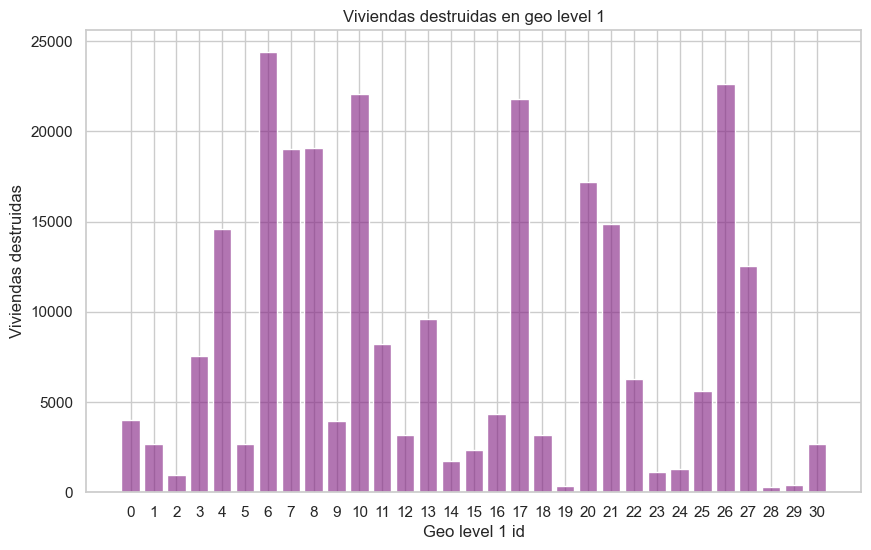

In [308]:
plt.figure(figsize=(10,6))
plt.bar(geo_level_1['geo_level_1_id'], geo_level_1['cantidad_viviendas_destruidas'], color = (0.5,0.1,0.5,0.6))
 
plt.title('Viviendas destruidas en geo level 1')
plt.xlabel('Geo level 1 id')
plt.ylabel('Viviendas destruidas')
 
plt.xticks(np.arange(len(geo_level_1['geo_level_1_id'].to_list())),geo_level_1['geo_level_1_id'].to_list())
 
plt.show()

### ¿Qué nivel de daño tiene cada zona?

In [309]:
df_buildings.head()

,damage_grade,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,
802906,3,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
28830,2,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
94947,3,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
590882,2,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
201944,3,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False


In [310]:
geo_level_1_dmg = df_buildings.loc[:, ['geo_level_1_id', 'geo_level_2_id', 'damage_grade']].reset_index()\
    .groupby(['geo_level_1_id', 'damage_grade']).count().reset_index()
geo_level_1_dmg.rename(columns = {'geo_level_2_id':'cantidad_viviendas_destruidas'}, inplace = True)
dmg_1 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 1,:]
dmg_2 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 2,:]
dmg_3 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 3,:]

#la geo level 1 id 28 no tuvo ninguna viviendo com dmg 1, son todas viviendas con dmg 2 y 3
dmg_1.head(1)

,geo_level_1_id,damage_grade,building_id,cantidad_viviendas_destruidas
0,0,1,337,337


In [311]:
#agregamos una fila con el id 28 para contabilizar que hay 0 viviendas destruidas para ese id con dmg 1
df_aux = pd.DataFrame(columns=['geo_level_1_id','damage_grade', 'building_id', 'cantidad_viviendas_destruidas'])
df_aux
df_aux.loc[0] = [28,1, None, 0]
df_aux

,geo_level_1_id,damage_grade,building_id,cantidad_viviendas_destruidas
0,28.00,1.00,nan,0.00


In [312]:
geo_level_1_dmg = geo_level_1_dmg.append(df_aux, ignore_index=True)


In [313]:
geo_level_1_dmg.sort_values(['geo_level_1_id', 'damage_grade'], inplace=True)

In [314]:
dmg_1 = geo_level_1_dmg.loc[geo_level_1_dmg['damage_grade'] == 1,:]

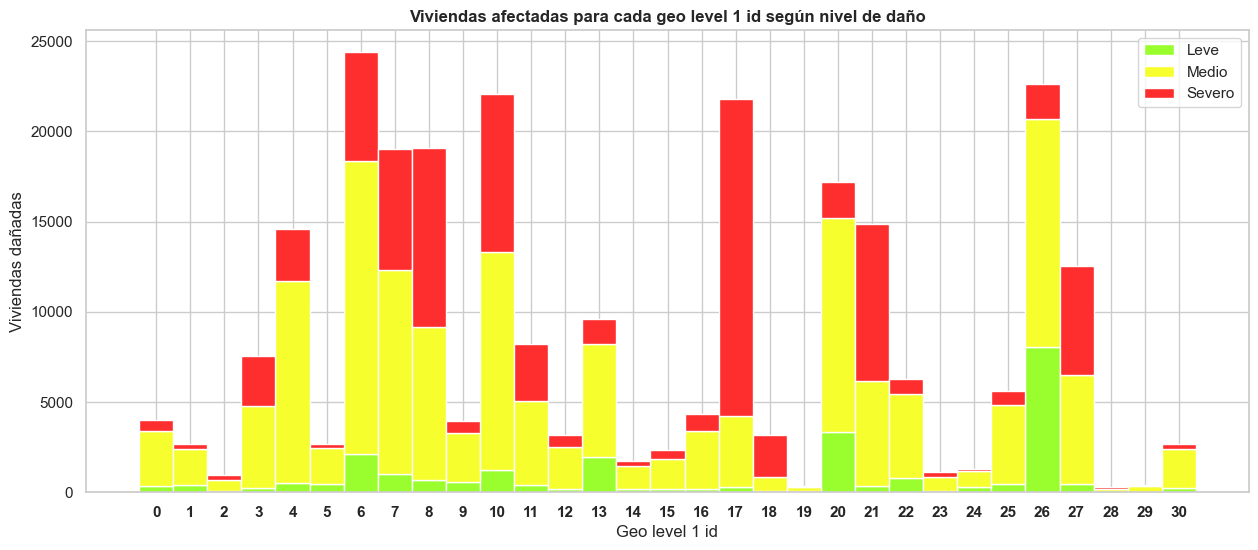

In [315]:
#Viviendas destruidas Vs. Geo Level 1 id
bars1 = dmg_1['cantidad_viviendas_destruidas']
bars2 =  dmg_2['cantidad_viviendas_destruidas']
bars3 = dmg_3['cantidad_viviendas_destruidas']

bars = np.add(bars1.to_list(), bars2.to_list())

r = geo_level_1['geo_level_1_id']
names = geo_level_1['geo_level_1_id']

barWidth = 1

plt.figure(figsize=(15,6))

plt.bar(r, bars1, color='#9AFE2E', edgecolor='white', width=barWidth, label = 'Leve')
plt.bar(r, bars2, bottom=bars1, color='#F7FE2E', edgecolor='white', width=barWidth, label = 'Medio')
plt.bar(r, bars3, bottom=bars, color='#FE2E2E', edgecolor='white', width=barWidth, label = 'Severo')
 
plt.xticks(r, names, fontweight='bold')

plt.xlabel("Geo level 1 id")
plt.ylabel("Viviendas dañadas")
plt.title("Viviendas afectadas para cada geo level 1 id según nivel de daño", fontweight='bold')

plt.legend()
plt.show()

A partir del gráfico presentado anteriormente podemos observar que el geo level 1 con id 17 se destaca notablemente de los demás teniendo la mayor cantidad de viviendas afectadas con un nivel de daño severo.

Otro id notable es el 6 que posee la mayor cantidad de viviendas damnificadas. Sin embargo, su gran mayoría son de daño medio. En contrapartida, remarcamos los id's 19, 28 y 29 por tener ínfimos daños en comparación al resto.

Si bien la zona 26 se encuentra entre las más afectadas, cabe señalar que hubo un gran porcentaje que sólo sufrió daños leves.

### ¿Existe una relación entre el nivel de daño severo y el tipo de suelo?

In [316]:
df_buildings = df_buildings.reset_index()

In [317]:
df_land = df_buildings.loc[df_buildings['damage_grade'] == 3, ['geo_level_1_id', 'land_surface_condition', 'building_id']]\
   .groupby(['geo_level_1_id', 'land_surface_condition']).count().reset_index()

In [318]:
df_land.rename(columns = {'building_id':'cantidad_viviendas_destruidas'}, inplace=True)
df_land_n = df_land.loc[df_land['land_surface_condition'] == 'n', :]
df_land_t = df_land.loc[df_land['land_surface_condition'] == 't', :]
df_land_o = df_land.loc[df_land['land_surface_condition'] == 'o', :]


In [319]:
df_by_land = df_land.groupby('geo_level_1_id').count().reset_index()
df_by_land.head()

,geo_level_1_id,land_surface_condition,cantidad_viviendas_destruidas
0,0,3,3
1,1,3,3
2,2,3,3
3,3,3,3
4,4,3,3


In [320]:
df_by_land.drop(columns = ['land_surface_condition', 'cantidad_viviendas_destruidas'], inplace=True)

In [321]:
df_by_land = df_by_land.merge(df_land_n, on = 'geo_level_1_id')

In [322]:
df_by_land.rename(columns = {'cantidad_viviendas_destruidas' : 'land_n'}, inplace=True)

In [323]:
df_by_land.drop(columns = 'land_surface_condition', inplace = True)

In [324]:
df_by_land = df_by_land.merge(df_land_t, on = 'geo_level_1_id')

In [325]:
df_by_land.rename(columns = {'cantidad_viviendas_destruidas' : 'land_t'}, inplace=True)

In [326]:
df_by_land.drop(columns = 'land_surface_condition', inplace = True)

In [327]:
df_by_land = df_by_land.merge(df_land_o, on = 'geo_level_1_id')

In [328]:
df_by_land.rename(columns = {'cantidad_viviendas_destruidas' : 'land_o'}, inplace=True)

In [329]:
df_by_land.drop(columns = 'land_surface_condition', inplace = True)

In [330]:
df_by_land = df_by_land.set_index('geo_level_1_id')

Text(0.5, 0, 'Geo level 1 id')

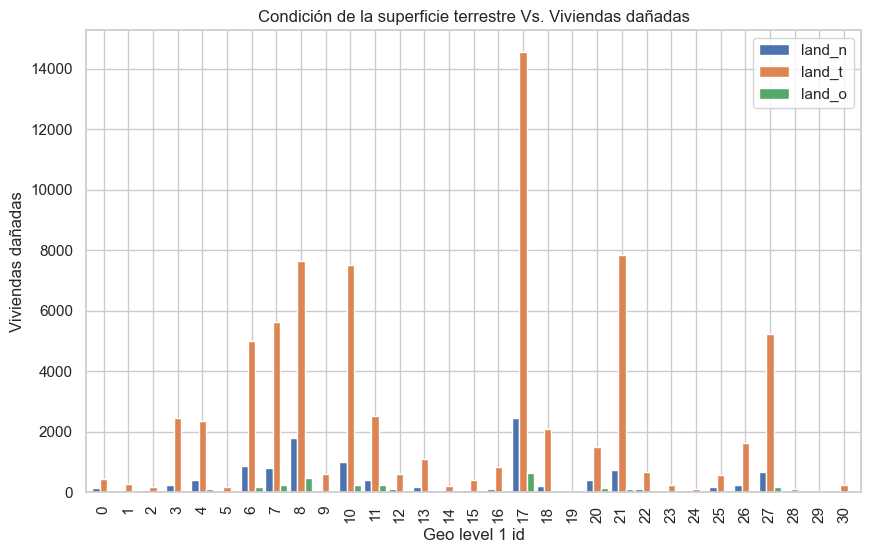

In [331]:
land_plot = df_by_land.plot(kind='bar', figsize=(10,6), width = 0.9, title = 'Condición de la superficie terrestre Vs. Viviendas dañadas')
land_plot.set_ylabel('Viviendas dañadas')
land_plot.set_xlabel('Geo level 1 id')

A partir del gráfico anterior podemos visualizar que predomina la condición de superficie terrestre tipo t, por lo que suponemos que este tipo de superficie no es ideal para eventos sísmicos.

Además por el gráfico previo a este, sabíamos que la mayor cantidad de viviendas dañadas con nivel severo se encontraban en el geo level 1 id 17, esto coincide con este gráfico ya que el máximo de viviendas dañadas de suelo t se encuentra en dicha zona.

# Análisis de tipos de cimientos utilizados para la construcción

La idea es ver si existe algún tipo de cimiento más propenso a destruirse ante un terremoto.

In [343]:
df_cimientos = df_buildings.loc[:, ['building_id', 'damage_grade', 'foundation_type']]
df_cimientos_grouped = df_cimientos.groupby(['foundation_type', 'damage_grade']).count().reset_index()

In [346]:
df_cimientos_grouped.rename(columns = {'building_id' : 'cantidad_viviendas_destruidas'}, inplace=True)

In [348]:
df_cimientos['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

Acá ya podemos observar que el tipo de cimiento c es el más utilizado por amplia diferencia con los demás. Por otro lado, el tipo de cimiento h es utilizado muy poco.

In [356]:
cimientos_r = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'r', :]
cimientos_w = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'w', :]
cimientos_u = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'u', :]
cimientos_i = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'i', :]
cimientos_h = df_cimientos_grouped.loc[df_cimientos_grouped['foundation_type'] == 'h', :]
cimientos_h

,foundation_type,damage_grade,cantidad_viviendas_destruidas
0,h,1,358
1,h,2,579
2,h,3,511


In [368]:
cimientos = cimientos_r.merge(cimientos_w, on = 'damage_grade')

In [370]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas_x' : 'foundation_r'\
                       , 'cantidad_viviendas_destruidas_y' : 'foundation_w'},inplace=True)

In [374]:
cimientos.drop(columns = ['foundation_type_x', 'foundation_type_y'], inplace=True)

In [381]:
cimientos = cimientos.merge(cimientos_u)

In [382]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas':'foundation_u'}, inplace=True)

In [385]:
cimientos.drop(columns = 'foundation_type', inplace=True)

In [386]:
cimientos = cimientos.merge(cimientos_i)

In [387]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas':'foundation_i'}, inplace=True)

In [388]:
cimientos.drop(columns = 'foundation_type', inplace=True)

In [389]:
cimientos = cimientos.merge(cimientos_h)

In [390]:
cimientos.rename(columns = {'cantidad_viviendas_destruidas':'foundation_h'}, inplace=True)

In [391]:
cimientos.drop(columns = 'foundation_type', inplace=True)

In [394]:
cimientos.set_index('damage_grade', inplace=True)

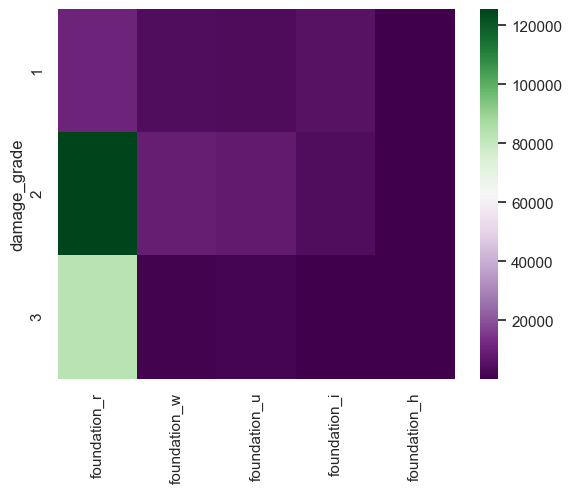

In [411]:
sns.heatmap(cimientos, cmap = 'PRGn')

Del gráfico anterior podemos ver que los cimientos del tipo w, u, i, h se comportaron de manera similar frente al terremoto. En todos ellos la cantidad de viviendas destruidas es aproximadamente la misma y no se distinguen notorias diferencias entre los distintos grados de daño.

El único tipo de cimiento a destacar es el del tipo r debido a que se observa que la cantidad de viviendas destruidas aumenta notablemente en comparación a los otros. Además, los daños causados son en su mayoría de grado 2 y 3.

Por estos motivos, suponemos que el cimiento de tipo r es el menos recomendado para la construcción de una casa en zonas propensas a terremotos. 